DOCUMENT ONE

According to ABS (2021), housing continues to be Australia's largest asset class, worth approximately $7.7 trillion, and yet, the study of real estate sentiment in Australia has been profoundly under-researched to date (Nanda & Heinig, 2018). Conversely, current literature reviews have established a strong connection between investor sentiment and stock returns in general, which would in turn suggests that there is also some degree of correlation between real estate sentiment and the strength of the property market as well (Bisen, 2020; Bharathi & Geetha, 2017; Corredor, Ferrer & Santamaria, 2011). In view of these findings, it was clear that there existed an opportunity to exploit this underutilisation in real estate sentiment within Australia to gain a competitive edge in estimating where and when to invest in Australian housing. As such, this Project aims to autonomously estimate the strength of the property market across all states and territories in Australia, as a function of time, by relying on trusted Australian news sources.

This Project posed several distinct challenges, including:
- **Identifying the right news sources:** only trusted Australian news sources were considered, which meant first examining their machinery of care, transparency, expertise and agenda (Caulfield, 2017). Furthermore, only news sources which provided consent for web crawling their data were pursued in order to remain ethical. The combination of these two factors significantly limited the candidates of websites to consume.
- **Extracting places from news articles:** it was deemed highly likely that multiple states and territories could be mentioned in any given news article, which was regarded as significant since there could be differing sentiments per article depending on the location being discussed. Hence, it was important to be able to separately identify all of the place entities within the corpus. This assumed that only one state or territory would be mentioned in any given sentence for every news article.
- **Providing an autonomous solution:** the proposed solution needed to be able to automatically interact with a web browser, consume news article data from the chosen news sources and then make predictions as to the dominant sentiment of each state or territory without any human intervention.
- **Resource limitations:** the proposed solution needed to be achieved without exceeding the 8GB GPU memory offered by the available resources. This ruled out state-of-the-art model solutions such as BERT, which required more than 16GB GPU memory for most fine-tuning experiments (Hui, 2019).



(Nanda & Heinig, 2018) - http://centaur.reading.ac.uk/72893/1/170930_Revised_Manuscript.pdf

(ABS, 2021) - https://www.abs.gov.au/statistics/economy/price-indexes-and-inflation/residential-property-price-indexes-eight-capital-cities/latest-release#:~:text=last%20twelve%20months.-,Total%20value%20of%20the%20dwelling%20stock,rose%20by%2044%2C100%20to%2010%2C602%2C700.

(Corredor, Ferrer & Santamaria, 2011) - https://www.researchgate.net/publication/228318309_Investor_Sentiment_Effect_in_Stock_Markets_Stock_Characteristics_or_Country-Specific_Factors

(Bisen, 2020) - https://medium.com/vsinghbisen/how-sentiment-analysis-in-stock-market-used-for-right-prediction-5c1bfe64c233

(Bharathi & Geetha, 2017) - https://www.researchgate.net/publication/317214679_Sentiment_Analysis_for_Effective_Stock_Market_Prediction

(Caulfield, 2017) - https://webliteracy.pressbooks.com/chapter/what-makes-a-trustworthy-news-source/

(Hui, 2019) - https://medium.com/nvidia-ai/how-to-scale-the-bert-training-with-nvidia-gpus-c1575e8eaf71#:~:text=For%20most%20of%20the%20fine,and%20later%20combine%20the%20results.

# Setup

## Import Libraries

In [1]:
import warnings # suppress warnings
warnings.filterwarnings('ignore') # suppress warnings
from selenium import webdriver # for opening webdriver
from selenium.webdriver.common.keys import Keys # for displaying useful keys
import time # for implementing time delays
import pandas as pd # for creating dataframes
pd.options.mode.chained_assignment = None  # to suppress SettingWithCopyWarning
from selenium.common.exceptions import NoSuchElementException # for raising exceptions
import ast # for converting string list representation to list
from ast import literal_eval # for converting string list representation to list
import re # use regex to perform acquisition of selective sentence
import numpy as np # for working with arrays
from datetime import datetime # convert to datetime
import nltk # import nltk for sentiment analysis
#nltk.download('wordnet')
#nltk.download('vader_lexicon')
from nltk.stem import WordNetLemmatizer # for lemmatisation
#from geopy.geocoders import Nominatim # for open-source geoencoding
import spacy # for NER
from spacy import displacy # for displaying NER results
from nltk.sentiment.vader import SentimentIntensityAnalyzer # import nltk for sentiment analysis
#nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize # tokenize words for removal of stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer # detokenize text
import matplotlib.pyplot as plt # for plotting
from matplotlib.pyplot import figure # for plotting
import pickle # for saving and loading best model from hyperparameter tuning
import seaborn as sns # for plotting confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, mean_squared_error # for analysing classification results
from sklearn.datasets import make_classification # for making classifications
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score # for model assessment
from sklearn.feature_extraction.text import TfidfVectorizer # for creating TF-IDF matrix
from sklearn.linear_model import LogisticRegression # for logistic regression modelling
from sklearn.multiclass import OneVsRestClassifier #for handling multiclass labels
from sklearn.svm import SVC # for support vector machine modelling
from sklearn.naive_bayes import MultinomialNB # for multinomial naive bayes modelling
from sklearn import metrics # to check for overfitting
from tabulate import tabulate # for printing results in a tabular format

## Configure Pandas

In [2]:
# configure pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Models

In [3]:
nlp = spacy.load('en_core_web_sm') # for trained NER model

# Acquire Property News Data

## Obtain List of Relevant URLs via Web Crawling

In [4]:
## open driver
#driver = webdriver.Chrome(r"C:\Users\Imran\Documents\chromedriver\chromedriver.exe")
## go to website
#driver.get('https://www.onthehouse.com.au/news')
## take a brief pause so that we remain a nice little web crawler for the website
#time.sleep(5)

## extract page numbering of website
#element = driver.find_element_by_xpath('//*[@id="block-views-blockarticles-property-news-block-1"]/div/div/nav/li')
#page_data = element.get_attribute('innerHTML').replace("\n", "")

## locate max page limit from page numbering and remove trailing and leading white spaces from it
#max_page_limit = int(page_data[page_data.find("of")+2:].split()[0].strip())

## empty list for urls
#url_list = []

## seed page number
#i = 1
## define last page for web crawling urls
#last_page = max_page_limit
## loop through pages
#while i < last_page:
    ## seed news article number on page
    #j = 1
    #while j <= 5:
        #print("i:", i,", j:", j)
        ## extract url for news article
        #URL = driver.find_element_by_xpath('//*[@id="block-views-blockarticles-property-news-block-1"]/div/div/div['+\
                                           #str(j)+']/a').get_attribute("href")
        ## take a brief pause so that we remain a nice little web crawler for the website
        #time.sleep(2)
        ## append extracted url to list
        #url_list.append(URL)
        ## cycle to next news article on the page
        #j = j + 1
    ## take a brief pause so that we remain a nice little web crawler for the website
    #time.sleep(20)
    #i = i + 1
    ## define button for going to next page once all news article urls have been scraped on this page
    #next_page_button = driver.find_element_by_xpath("//a[@rel='next']")

    ## click button to next page
    #next_page_button.click()
    
## convert web crawled url list to dataframe
#url_df = pd.DataFrame(list(zip(url_list)), columns = ['URL'])

## save urls to csv (serves as a checkpoint)
#url_df.to_csv(r'C:/Users/Imran/Documents/MA5851Assessment3/url_df.csv', index=False)

## end the session
#driver.quit()

## Web Crawl Relevant Content from URL List

In [5]:
## read in csv saved previously
#url_df = pd.read_csv(r'C:/Users/Imran/Documents/MA5851Assessment3/url_df.csv')

## define function for web crawling property news URL
#def get_Content(x):
    ## open driver
    #driver = webdriver.Chrome(r"C:\Users\Imran\Documents\chromedriver\chromedriver.exe")
    ## go to website
    #driver.get(x)
    ## take a brief pause so that we remain a nice little web crawler for the website
    #time.sleep(5)

    ## get news article title
    #try:
        #title = driver.find_element_by_xpath('//*[@id="block-corelogic-content"]/article/div[1]/div/h1/span').text
    ## if title is missing, put N/A
    #except NoSuchElementException:
        #title = 'N/A'
    ## take a brief pause so that we remain a nice little web crawler for the website
    #time.sleep(5)
    
    ## get date of news article
    #try:
        #date = driver.find_element_by_xpath("//p[@class='paragraph-active news-date']").text
    ## if date is missing, put N/A
    #except NoSuchElementException:
        #date = 'N/A'
    ## take a brief pause so that we remain a nice little web crawler for the website
    #time.sleep(5)
    
    ## get body text of news article
    #try:
        #body = driver.find_element_by_xpath("//div[@property='schema:text']").get_attribute('innerText')
    ## if body is missing, put N/A
    #except NoSuchElementException:
        #body = 'N/A'
        
    ## take a brief pause so that we remain a nice little web crawler for the website
    #time.sleep(5)

    ## get labelled location tags for article
    #try:
        #tags = driver.find_element_by_xpath("//div[@class='field_article_state']").text
    ## if tag is missing, put N/A
    #except NoSuchElementException:
        #tags = 'N/A'
    
    ## end the session
    #driver.quit()
    
    ## return values
    #return title, date, body, tags

## apply webscraping function to data
#url_df['Title'], url_df['Date'], url_df['Body'], url_df['Tags'] = zip(*url_df['URL'].map(get_Content))

## save urls to csv (serves as a checkpoint)
#url_df.to_csv(r'C:/Users/Imran/Documents/MA5851Assessment3/web_crawled_data_09042020.csv', index = False)

# Preliminary Data Preprocessing

In [6]:
# read in csv saved previously
data = pd.read_csv(r'C:/Users/Imran/Documents/MA5851Assessment3/web_crawled_data_09042020.csv')

# translate missing values to nan
data = data.replace(('*/*', '', 'nan', '0', 'N/A'), np.nan)

# transform date
def convert_to_date(x):
    date_time_obj = datetime.strptime(x, '%d-%b-%y')
    return date_time_obj
data['Date_Transformed'] = data['Date'].apply(convert_to_date)

# transform body tags
# replace unwanted strings
data['Body_Transformed'] = data['Body'].str.replace(r'\n',' ', regex=True)
data['Body_Transformed'] = data['Body_Transformed'].str.replace(r'\xa0',' ', regex=True)
data['Body_Transformed'] = data['Body_Transformed'].str.replace(r'â€™','', regex=True)
data['Body_Transformed'] = data['Body_Transformed'].str.replace(r'â€˜','', regex=True)
data['Body_Transformed'] = data['Body_Transformed'].str.replace(r'â€œ','', regex=True)
data['Body_Transformed'] = data['Body_Transformed'].str.replace(r'â€“','', regex=True)

# remove excess white space
data['Body_Transformed'] = data['Body_Transformed'].astype(str).apply(lambda x: ' '.join(x.split()))

# transform Tags
data['Tags_Transformed'] = data['Tags'].str.replace(r' ',"', '", regex=True)
data['Tags_Transformed'] = "'" + data['Tags_Transformed'].astype(str) + "'"
def literal_return(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError) as e:
        return val
data['Tags_Transformed'] = data['Tags_Transformed'].apply(literal_return)

# select relevant columns for further processing
data2 = data[['Title', 'Date_Transformed', 'Body_Transformed', 'Tags_Transformed']]

# duplicate article for each place tag listed
data_overview = data
data_overview = data_overview.explode('Tags_Transformed').reset_index(drop = True)

# Exploratory Data Analysis

In [7]:
# check shape of data webcrawled
nrow, ncol = data_overview.shape
nrow, ncol

(1291, 8)

In [40]:
# check first couple of rows in dataframe
data_overview.head()

,URL,Title,Date,Body,Tags,Date_Transformed,Body_Transformed,Tags_Transformed
0,https://www.onthehouse.com.au/news/melbourne-p...,Melbourne property values regain COVID loss an...,29-Mar-21,Melbourne dwelling values have surpassed their...,National VIC,2021-03-29,Melbourne dwelling values have surpassed their...,National
1,https://www.onthehouse.com.au/news/melbourne-p...,Melbourne property values regain COVID loss an...,29-Mar-21,Melbourne dwelling values have surpassed their...,National VIC,2021-03-29,Melbourne dwelling values have surpassed their...,VIC
2,https://www.onthehouse.com.au/news/profitabili...,Profitability in Australian dwellings rose ove...,25-Mar-21,This edition of the Pain and Gain report analy...,National NSW VIC QLD NT TAS ACT WA SA,2021-03-25,This edition of the Pain and Gain report analy...,National
3,https://www.onthehouse.com.au/news/profitabili...,Profitability in Australian dwellings rose ove...,25-Mar-21,This edition of the Pain and Gain report analy...,National NSW VIC QLD NT TAS ACT WA SA,2021-03-25,This edition of the Pain and Gain report analy...,NSW
4,https://www.onthehouse.com.au/news/profitabili...,Profitability in Australian dwellings rose ove...,25-Mar-21,This edition of the Pain and Gain report analy...,National NSW VIC QLD NT TAS ACT WA SA,2021-03-25,This edition of the Pain and Gain report analy...,VIC


In [39]:
# check 
min(data_overview['Date_Transformed'])
max(data_overview['Date_Transformed'])

Timestamp('2017-05-02 00:00:00')

In [10]:
# check for null values
print("Nulls in 'Date'", data_overview['Date'].isnull().sum())
print("Nulls in 'Body'", data_overview['Body'].isnull().sum())
print("Nulls in 'Tags'", data_overview['Tags'].isnull().sum())

Nulls in 'Date' 0
Nulls in 'Body' 0
Nulls in 'Tags' 545


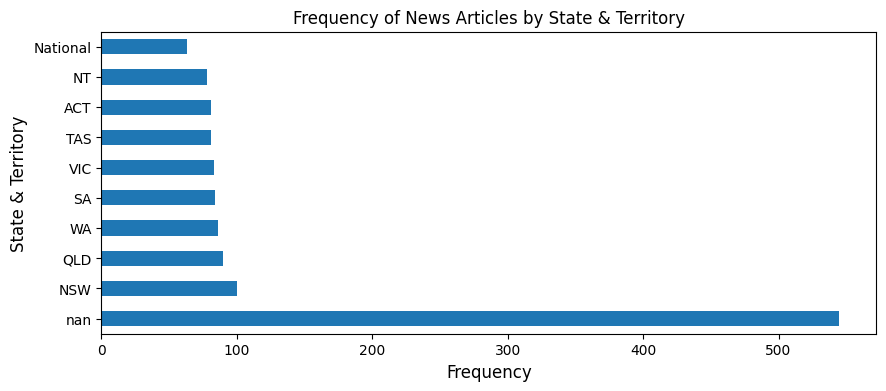

In [49]:
# specify fig size and dpi
figure(figsize=(10, 4), dpi=100)
data_overview['Tags_Transformed'].value_counts().plot(kind='barh')
plt.title('Frequency of News Articles by State & Territory', fontsize = 12)
plt.xlabel('Frequency', fontsize = 12)
plt.ylabel('State & Territory', fontsize = 12)
plt.show()

# Execute Natural Language Processing (NLP) Tasks

## Named Entity Recognition (NER)

### Identify Places

In [12]:
# define function for extracting geographical entities (GPE) and locations (LOC) using NER
def get_place_list(x):
    # apply nlp to news article
    article = nlp(x)
    # extract GPE entities from article
    place_list = [(X.text) for X in article.ents if (X.label_ == 'GPE') or (X.label_ == 'LOC')]
    # sort alphabetically and de-duplicate GPE list
    place_list = sorted(list(set(place_list)))
    return place_list
# apply function
data2['Place'] = data2['Body_Transformed'].apply(get_place_list)

# duplicate article for each GPE identified so sentimenet can be calculated per GPE
data2 = data2.explode('Place').reset_index(drop = True)

# select relevant sentences for each place
def get_sentences(place, text):
    # extract only the sentences containing the places
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    sentences_list = [word for word in sentences if str(place) in word]
    # use list comprehension convert list to string
    #sentences_string = ' '.join([str(elem) for elem in sentences_list])
    #return sentences_string
    return sentences_list
data2['Relevant_Body'] = data2.apply(lambda x: get_sentences(x['Place'], x['Body_Transformed']), axis=1)

# duplicate article for each GPE identified so sentimenet can be calculated per GPE
data2 = data2.explode('Relevant_Body').reset_index(drop = True)

In [13]:
## define function for extracting geographical entities (GPE) and locations (LOC) using NER
#def get_additional_context(text, sentence):
    #index = text.find(str(sentence))
    #if index < 0:
        #string = sentence
    #else:
        #start = index - 110
        #end = index + len(str(sentence)) + 110
        #if start <= 0:
            #start = 0
        #else:
            #start = start
        #string = text[start:end]
        #space_index_start = string.find(" ")
        #space_index_end = string.rfind(" ")
        #string = string[space_index_start:space_index_end]
    #return string
## apply function
#data2['Relevant_Body2'] = data2.apply(lambda x: get_additional_context(x['Body_Transformed'], x['Relevant_Body']), axis=1)

In [14]:
# define function for extracting geographical entities (GPE) and locations (LOC) using NER
def get_additional_context(text, sentence):
    index = text.find(str(sentence))
    if index < 0:
        string = sentence
    else:
        start = index - 110
        end = index + len(str(sentence)) + 110
        if start <= 0:
            start = 0
            string = text[start:end]
            end_new = string.rfind(" ")
            string = string[start:end_new]
        else:
            start = start
            string = text[start:end]
            start_new = string.find(" ")
            end_new = string.rfind(" ")
            string = string[start_new:end_new]
    return string
# apply function
data2['Relevant_Body2'] = data2.apply(lambda x: get_additional_context(x['Body_Transformed'], x['Relevant_Body']), axis=1)

Example of results:

In [15]:
#example_text = data2['Body_Transformed'].iloc[135]
#displacy.render(nlp(example_text), jupyter=True, style='ent')

### Standardise Locations

In [16]:
## get unique values of geographical entities as repeated queries using Nominatim is not allowed per the usage policy
#data2_unique = data2[['Place']].drop_duplicates(keep = 'first')
## specify user agent as per usage policy
#geolocator = Nominatim(user_agent="geoapiExercises")

## define function to get the full address of Geographical Entity
#def get_full_address(x):
    #location = geolocator.geocode(x)
    ## limit requests to 1 every 1 second as per usage policy
    #time.sleep(1)
    #try:
        #address = location.address
    #except:
        #address = 'None'
    #return address
#data2_unique['Full_Address'] = data2_unique['Place'].apply(get_full_address)

## save addresses to csv (serves to cache the results so as to not repeat queries as per usage policy of Nominatim)
#data2_unique.to_csv(r'C:/Users/Imran/Documents/MA5851Assessment3/standardised_addresses.csv', index = False)

In [17]:
# read in csv saved previously
standardised_addresses = pd.read_csv(r'C:/Users/Imran/Documents/MA5851Assessment3/standardised_addresses.csv')

# merge full address to dataframe by the place variable
data3 = data2.merge(standardised_addresses, on = 'Place', how = 'left')

# identify state
def get_Key_Place(x):
    if ('Australia' in str(x)) and ('New South Wales' in str(x)):
        Key_Place = 'NSW'
    elif ('Australia' in str(x)) and ('Queensland' in str(x)):
        Key_Place = 'QLD'
    elif ('Australia' in str(x)) and ('South Australia' in str(x)):
        Key_Place = 'SA'
    elif ('Australia' in str(x)) and ('Tasmania' in str(x)):
        Key_Place = 'TAS'
    elif ('Australia' in str(x)) and ('Victoria' in str(x)):
        Key_Place = 'VIC'
    elif ('Australia' in str(x)) and ('Western Australia' in str(x)):
        Key_Place = 'WA'
    elif ('Australia' in str(x)) and ('Northern Territory' in str(x)):
        Key_Place = 'NT'
    elif ('Australia' in str(x)) and ('Australian Capital Territory' in str(x)):
        Key_Place = 'ACT'
    elif ('Australia' in str(x)):
        Key_Place = 'National'
    else:
        Key_Place = "Overseas"
    return Key_Place
data3['Place_Tag'] = data3['Full_Address'].apply(get_Key_Place)

In [55]:
place_labelled.head(500)

,Title,Date_Transformed,Body_Transformed,Tags_Transformed,Place,Relevant_Body,Relevant_Body2,Full_Address,Place_Tag,Place_Matched,Body_Cleaned,Index
1,Melbourne property values regain COVID loss an...,2021-03-29,Melbourne dwelling values have surpassed their...,"(National, VIC)",Melbourne,Melbourne dwelling values have surpassed their...,Melbourne dwelling values have surpassed their...,"Melbourne, City of Melbourne, Victoria, Australia",VIC,Matched,melbourne dwelling value surpassed earlier apr...,1
2,Melbourne property values regain COVID loss an...,2021-03-29,Melbourne dwelling values have surpassed their...,"(National, VIC)",Melbourne,“Reflecting what we saw in Sydney earlier this...,strong capital gains in housing values led Au...,"Melbourne, City of Melbourne, Victoria, Australia",VIC,Matched,strong capital gain housing value led australi...,2
3,Melbourne property values regain COVID loss an...,2021-03-29,Melbourne dwelling values have surpassed their...,"(National, VIC)",Melbourne,"Following a decline of -6.1% through COVID-19,...","this month, Melbourne dwelling values have no...","Melbourne, City of Melbourne, Victoria, Australia",VIC,Matched,month melbourne dwelling value surpassed previ...,3
4,Melbourne property values regain COVID loss an...,2021-03-29,Melbourne dwelling values have surpassed their...,"(National, VIC)",Sydney,“Reflecting what we saw in Sydney earlier this...,strong capital gains in housing values led Au...,"Sydney, New South Wales, Australia",NSW,No Match,strong capital gain housing value led australi...,4
11,Profitability in Australian dwellings rose ove...,2021-03-25,This edition of the Pain and Gain report analy...,"(National, NSW, VIC, QLD, NT, TAS, ACT, WA, SA)",Lake Macquarie,"These were Geelong (98.5%), the Mid North Coas...",5 of the 9 regions measured saw a rate of pro...,"Lake Macquarie, Rathmines, Lake Macquarie City...",NSW,Matched,region measured saw rate profit making sale ...,11
12,Profitability in Australian dwellings rose ove...,2021-03-25,This edition of the Pain and Gain report analy...,"(National, NSW, VIC, QLD, NT, TAS, ACT, WA, SA)",Melbourne,Combined losses from resales also shrank from ...,from resales in the December quarter rose to ...,"Melbourne, City of Melbourne, Victoria, Australia",VIC,Matched,resale december quarter rose billion billion...,12
13,Profitability in Australian dwellings rose ove...,2021-03-25,This edition of the Pain and Gain report analy...,"(National, NSW, VIC, QLD, NT, TAS, ACT, WA, SA)",Melbourne,"Across Greater Melbourne, the rate of profit m...","and Lake Macquarie region (96.7%), the Richmo...","Melbourne, City of Melbourne, Victoria, Australia",VIC,Matched,lake macquarie region richmond tweed region a...,13
14,Profitability in Australian dwellings rose ove...,2021-03-25,This edition of the Pain and Gain report analy...,"(National, NSW, VIC, QLD, NT, TAS, ACT, WA, SA)",Melbourne,This reflected a turn in Melbourne dwelling va...,increased significantly from 93.0% in the 3 m...,"Melbourne, City of Melbourne, Victoria, Australia",VIC,Matched,increased significantly month september mo...,14
16,Profitability in Australian dwellings rose ove...,2021-03-25,This edition of the Pain and Gain report analy...,"(National, NSW, VIC, QLD, NT, TAS, ACT, WA, SA)",the Sunshine Coast,"These were Geelong (98.5%), the Mid North Coas...",5 of the 9 regions measured saw a rate of pro...,"Sunshine Coast, Sunshine Coast Regional, Queen...",QLD,Matched,region measured saw rate profit making sale ...,16
19,"Housing lending may be cheap, but regulators a...",2021-03-22,New data suggests changes to mortgage lending ...,"(National, NSW, SA, VIC, QLD, TAS, WA, ACT, NT)",Melbourne,The December 2020 quarter is of particular imp...,"in lending standards, suggesting there is no ...","Melbourne, City of Melbourne, Victoria, Australia",VIC,Matched,lending standard suggesting need intervention ...,19


In [51]:
place_labelled.Tags_Transformed.iloc[1]

('National', 'VIC')

In [53]:
b = place_labelled.Tags_Transformed.iloc[1]
str(b).find("VIC")

14

### Assess Place Model Accuracy

In [58]:
def place_matched(Place_Tag, Tags_Transformed):
    if str(Tags_Transformed).find(str(Place_Tag)) >=0:
        return 'Matched'
    else:
        return 'No Match'

# apply function
data3['Place_Matched'] = data3.apply(lambda x: place_matched(x['Place_Tag'], x['Tags_Transformed']), axis=1)

# subset to only include labelled records
place_labelled = data3[data3['Tags_Transformed']!='nan']

# subset records to only include places which have been indexed by a state or territory
place_labelled = place_labelled[(place_labelled['Place_Tag'] != 'Overseas') & (place_labelled['Place_Tag'] != 'National')]

# compute accuracy
total = len(place_labelled)
matched = len(place_labelled[place_labelled['Place_Matched']=='Matched'])
Accuracy = matched/total
print("Place Model Accuracy:", "{0:.0%}".format(Accuracy))

Place Model Accuracy: 73%


## Sentiment Analysis

### Data Preprocessing Continued

In [19]:
# remove excess white space
data3['Body_Cleaned'] = data3['Relevant_Body2'].astype(str).apply(lambda x: ' '.join(x.split()))

# convert to lowercase
data3['Body_Cleaned'] = data3['Body_Cleaned'].str.lower()

# remove punctuation
data3['Body_Cleaned'] = data3['Body_Cleaned'].str.replace(r'[^\w\s]', '', regex = True)

# remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_tokenized_text = [word for word in word_tokens if word not in stopwords]
    filtered_text = TreebankWordDetokenizer().detokenize(filtered_tokenized_text)
    return filtered_text
data3['Body_Cleaned'] = data3['Body_Cleaned'].apply(lambda x: remove_stopwords(x))

# apply lemmatisation
lemmatizer = WordNetLemmatizer()
def apply_lemmatisation(text):
    word_tokens = word_tokenize(text)
    filtered_tokenized_text = [lemmatizer.lemmatize(w) for w in word_tokens]
    filtered_text = TreebankWordDetokenizer().detokenize(filtered_tokenized_text)
    return filtered_text
data3['Body_Cleaned'] = data3['Body_Cleaned'].apply(lambda x: apply_lemmatisation(x))

# remove numbers
data3['Body_Cleaned'] = data3['Body_Cleaned'].str.replace(r'\d+','', regex=True)

### Label Sample Dataset

In [20]:
# save data to be labelled
data3.to_csv(r'C:/Users/Imran/Documents/MA5851Assessment3/unlabelleddata.csv', index = True)

# create new dataframe
data4 = data3

# read in csv saved previously
Labelled_Data = pd.read_csv(r'C:/Users/Imran/Documents/MA5851Assessment3/labelleddatafixed.csv')

# subset to only include labelled records
Labelled_Data = Labelled_Data[Labelled_Data['Label'].notna()]

# data type conversion
Labelled_Data['Label'] = Labelled_Data['Label'].astype(int)

# subset columns
Labelled_Data = Labelled_Data[['Index', 'Label']]

# merge label to dataframe
data4['Index'] = data4.index
data4 = pd.merge(data4, Labelled_Data, on ='Index', how = 'left')

# define model data
model_data = data4[['Body_Cleaned', 'Label']]

# subset to only include labelled records
model_data = model_data[model_data['Label'].notna()]

### Implementing a Valence Aware Dictionary and sEntiment Reasoner (VADER)

#### Acquiring Sentiment Scores

In [21]:
# call the SentimenetIntensityAnalyser object
analyser = SentimentIntensityAnalyzer()

# define function to return compound sentiment scores
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)['compound']
    return score

# get sentimenet for text
data4['Body_Sentiment'] = data4['Body_Cleaned'].apply(sentiment_analyzer_scores)

# subset dataframe to assess VADER accuracy
model_data2 = data4[['Body_Cleaned', 'Label', 'Body_Sentiment']]

# subset to only include labelled records
model_data2 = model_data2[model_data2['Label'].notna()]

# data type conversion
model_data2['Label'] = model_data2['Label'].astype(int)

#### Converting Sentiment Scores to Discrete Predictions using VADER

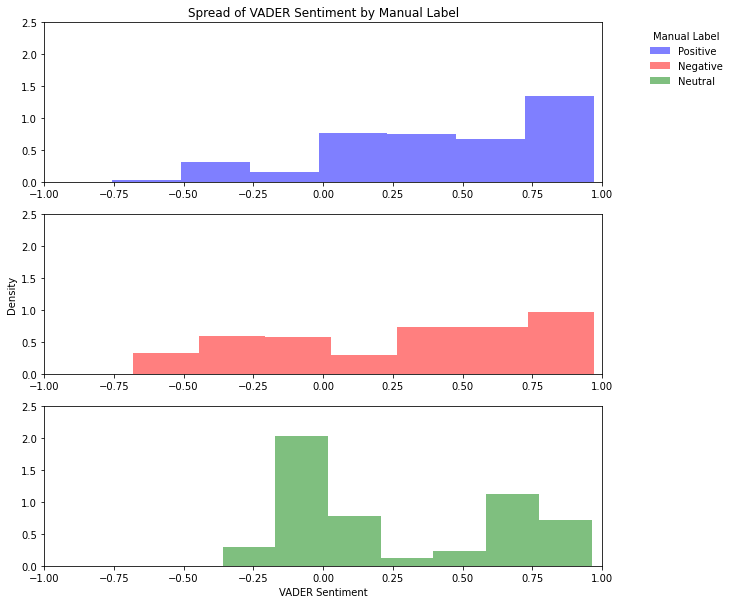

In [22]:
# define function to return compound sentiment scores
def get_Class(Label):
    if Label == 1:
        return 'Positive'
    if Label == 2:
        return 'Negative'
    else:
        return 'Neutral'

# get sentimenet for text
model_data2['Class'] = model_data2['Label'].apply(get_Class)

# set bins
bins = 7

# separate dataset into manual label classes
b1 = model_data2[model_data2['Class'] == 'Positive']
c1 = b1['Body_Sentiment']
b2 = model_data2[model_data2['Class'] == 'Negative']
c2 = b2['Body_Sentiment']
b3 = model_data2[model_data2['Class'] == 'Neutral']
c3 = b3['Body_Sentiment']

# define subplots
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111) 
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# plot subplots
ax1.hist(c1, bins = bins, color="blue", alpha = 0.5, density = True)[0]
ax2.hist(c2, bins = bins, color="red", alpha = 0.5, density = True)[0]
ax3.hist(c3, bins = bins, color="green", alpha = 0.5, density = True)[0]

# set x and y limits
ax1.set_xlim(-1, 1)
ax1.set_ylim(0, 2.5)
ax2.set_xlim(-1, 1)
ax2.set_ylim(0, 2.5)
ax3.set_xlim(-1, 1)
ax3.set_ylim(0, 2.5)

# Set common labels
ax.set_xlabel('VADER Sentiment')
ax.set_ylabel('Density')
ax1.set_title('Spread of VADER Sentiment by Manual Label')

# Create the legend
line_labels = ["Positive", "Negative", "Neutral"]
fig.legend([ax1, ax2, ax3],
           labels = line_labels,
           loc="upper right",
           bbox_to_anchor = (1.08, 0.88),
           title = "Manual Label",
           frameon = False)

# show plot
plt.show()

From the above plots, the following class thresholds were chosen for converting sentiment scores to discrete predictions that align with the manual labelling effort.

In [23]:
# get VADER label
def get_VADER_label(i):
    if float(i) > 0:
        return 1
    elif float(i) >= -0.1 and float(i) <=0:
        return 0
    else:
        return 2

# get label from VADER sentiment
model_data2['VADER Prediction'] = model_data2['Body_Sentiment'].apply(get_VADER_label)

# data type conversion
model_data2['VADER Prediction'] = model_data2['VADER Prediction'].astype(int)

#### Assess the Precision and Recall of the VADER Model

In [24]:
# assess results
target_names = ['Neutral', 'Positive', 'Negative']
print(classification_report(model_data2['Label'], model_data2['VADER Prediction'], target_names = target_names))

              precision    recall  f1-score   support

     Neutral       0.45      0.38      0.41        89
    Positive       0.50      0.77      0.61       227
    Negative       0.58      0.24      0.34       184

    accuracy                           0.51       500
   macro avg       0.51      0.47      0.46       500
weighted avg       0.52      0.51      0.48       500



### Preparing Data for Training New Models

The first line above, gets the word counts for the documents in a sparse matrix form. We could have actually used word_count_vector from above. However, in practice, you may be computing tf-idf scores on a set of new unseen documents. When you do that, you will first have to do cv.transform(your_new_docs) to generate the matrix of word counts.

Then, by invoking tfidf_transformer.transform(count_vector) you will finally be computing the tf-idf scores for your docs. Internally this is computing the tf * idf  multiplication where your term frequency is weighted by its IDF values.

https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.YHq2I-gzag0

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# split training and test data
train, test = train_test_split(model_data, test_size = 0.1, stratify = model_data['Label'], random_state = 101)

# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(train['Body_Cleaned'])
test_vectors = vectorizer.transform(test['Body_Cleaned'])

### Implementing a Weighted, Multinomial Logistic Regression Model

#### Logistic Regression Model Hyperparamter Tuning

Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers

The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

This also can be done during working on a ML model, that is, using validation set instead of cross-validation. However, to avoid “wasting” too much training data in validation sets, a common technique is to use cross-validation.

https://stats.stackexchange.com/questions/439485/how-to-evaluate-whether-model-is-overfitting-or-underfitting-when-using-cross-va

I suggest using GridSearchCV with StratifiedKFold (it's already the default strategy for GridSearchCV when passing a classifier as estimator).

https://stackoverflow.com/questions/31956501/sklearn-model-keeps-overfitting

In [26]:
# define estimator
LR_estimator = LogisticRegression(multi_class = 'multinomial', 
                                  class_weight='balanced', 
                                  penalty = 'l2', 
                                  random_state = 101)

# define range of parameters to optimise the estimator
LR_parameters = {'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# define function for optimising the estimator estimator
def optimised_LR_model(estimator, parameters):
    grid_search = GridSearchCV(estimator= estimator, 
                               param_grid = parameters, 
                               scoring = 'f1_macro',
                               cv = 10,
                               return_train_score = True,
                               verbose=True)

    grid_search.fit(train_vectors, train['Label'])

    optimised_LR_model = grid_search.best_estimator_

    pickle.dump(optimised_LR_model, open('optimised_LR_model.sav', 'wb'))
    
    # print results to check for overfitting
    #print("params", grid_search.cv_results_["params"])
    #print("best_estimator_", optimised_LR_model)
    
    data = [
    ["1", 
     str(round(grid_search.cv_results_["split1_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split1_test_score"][-1]*100,1)) + '%'],
    ["2", 
     str(round(grid_search.cv_results_["split2_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split2_test_score"][-1]*100,1)) + '%'],
    ["3", 
     str(round(grid_search.cv_results_["split3_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split3_test_score"][-1]*100,1)) + '%'],
    ["4", 
     str(round(grid_search.cv_results_["split4_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split4_test_score"][-1]*100,1)) + '%'],
    ["5", 
     str(round(grid_search.cv_results_["split5_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split5_test_score"][-1]*100,1)) + '%'],
    ["Mean \u00B1 Std Dev", 
     str(round((grid_search.cv_results_["mean_train_score"][-1])*100,1)) + "% \u00B1 " \
     + str(round((grid_search.cv_results_["std_train_score"][-1])*100,1)) + "%", 
     str(round((grid_search.cv_results_["mean_test_score"][-1])*100,1)) + "% \u00B1 " \
     + str(round((grid_search.cv_results_["std_test_score"][-1])*100,1)) + "%"]] 
    #print(tabulate(data, headers=["Split", "Train", "Test"]))
    
    with open("LR_output.txt", "a") as LR_output:
        print(tabulate(data, headers=["Split", "Train", "Test"]), file = LR_output)

## run function
#optimised_LR_model(LR_estimator, LR_parameters)
LR_output = open(r'C:/Users/Imran/Documents/MA5851Assessment3/LR_output.txt', "r")
print(LR_output.read())

Split           Train         Test
--------------  ------------  ------------
1               97.1%         39.8%
2               96.6%         66.7%
3               96.7%         68.1%
4               97.3%         70.4%
5               97.0%         73.8%
Mean ± Std Dev  96.9% ± 0.3%  64.4% ± 9.4%



Regulurisation using the L2 norm for penalisation was implemented in the logistic regression model in an attemot to prevent overfitting. Additionally, the cross-validation method of using stratified k-folds was also implemented using GridSearchCV in an attempt to prevent overfitting. However, when comparing the training and test scores, these attempts to prevent overfitting appeared to have failed. This was likely due to there being insufficient training data to accurately reflect the model's diversity and complexity.

https://www.kdnuggets.com/2019/09/mathworks-common-machine-learning-obstacles.html

#### Make Predictions using Logistic Regression Model

In [27]:
# load best estimator
optimised_LR_model = pickle.load(open('optimised_LR_model.sav', 'rb'))

# fit model for prediction making
optimised_LR_model.fit(train_vectors, train['Label'])

# make predictions
LR_y_pred = optimised_LR_model.predict(test_vectors)

#### Assess the Precision and Recall of the Logistic Regression Model

In [28]:
# assess results
target_names = ['Neutral', 'Positive', 'Negative']
print(classification_report(test['Label'], LR_y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Neutral       0.56      0.56      0.56         9
    Positive       0.67      0.78      0.72        23
    Negative       0.86      0.67      0.75        18

    accuracy                           0.70        50
   macro avg       0.69      0.67      0.68        50
weighted avg       0.72      0.70      0.70        50



### Implementing a Weighted, Multiclass Support Vector Machine Model

#### Support Vector Machine Model Hyperparamter Tuning

if not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Binary classification models like logistic regression and SVM do not support multi-class classification natively and require meta-strategies.
The One-vs-Rest strategy splits a multi-class classification into one binary classification problem per class.

https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/

In [29]:
# define nested estimator
SVM_estimator = OneVsRestClassifier(SVC(class_weight='balanced', random_state = 101))

# define range of parameters to optimise the estimator
SVM_parameters = {'estimator__kernel': ['poly', 'rbf', 'sigmoid'],
                 'estimator__C': [0.1, 1, 1],
                 'estimator__gamma': [0.001, 0.01, 0.1]}

# define function for optimising the estimator estimator
def optimised_SVM_model(estimator, parameters):
    grid_search = GridSearchCV(estimator= estimator, 
                               param_grid = parameters, 
                               scoring = 'f1_macro',
                               cv = 10,
                               return_train_score = True,
                               verbose=True)

    grid_search.fit(train_vectors, train['Label'])

    optimised_SVM_model = grid_search.best_estimator_

    pickle.dump(optimised_SVM_model, open('optimised_SVM_model.sav', 'wb'))

    # print results to check for overfitting
    #print("params", grid_search.cv_results_["params"])
    #print("best_estimator_", optimised_SVM_model)
    
    data = [
    ["1", 
     str(round(grid_search.cv_results_["split1_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split1_test_score"][-1]*100,1)) + '%'],
    ["2", 
     str(round(grid_search.cv_results_["split2_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split2_test_score"][-1]*100,1)) + '%'],
    ["3", 
     str(round(grid_search.cv_results_["split3_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split3_test_score"][-1]*100,1)) + '%'],
    ["4", 
     str(round(grid_search.cv_results_["split4_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split4_test_score"][-1]*100,1)) + '%'],
    ["5", 
     str(round(grid_search.cv_results_["split5_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split5_test_score"][-1]*100,1)) + '%'],
    ["Mean \u00B1 Std Dev", 
     str(round((grid_search.cv_results_["mean_train_score"][-1])*100,1)) + "% \u00B1 " \
     + str(round((grid_search.cv_results_["std_train_score"][-1])*100,1)) + "%", 
     str(round((grid_search.cv_results_["mean_test_score"][-1])*100,1)) + "% \u00B1 " \
     + str(round((grid_search.cv_results_["std_test_score"][-1])*100,1)) + "%"]] 
    #print(tabulate(data, headers=["Split", "Train", "Test"]))
    
    with open("SVM_output.txt", "a") as SVM_output:
        print(tabulate(data, headers=["Split", "Train", "Test"]), file = SVM_output)

## run function
#optimised_SVM_model(SVM_estimator, SVM_parameters)
SVM_output = open(r'C:/Users/Imran/Documents/MA5851Assessment3/SVM_output.txt', "r")
print(SVM_output.read())

Split           Train         Test
--------------  ------------  ------------
1               64.7%         36.7%
2               65.9%         68.3%
3               63.0%         64.0%
4               64.0%         47.8%
5               63.7%         61.8%
Mean ± Std Dev  64.9% ± 1.9%  54.6% ± 9.4%



Attempted to reduce overfitting by softening the SVM margin by limiting the parameter 'C' to be low.

#### Make Predictions using Support Vector Machine Model

In [30]:
# load best estimator
optimised_SVM_model = pickle.load(open('optimised_SVM_model.sav', 'rb'))

# fit model for prediction making
optimised_SVM_model.fit(train_vectors, train['Label'])

# make predictions
SVM_y_pred = optimised_SVM_model.predict(test_vectors)

#### Assess the Precision and Recall of the Support Vector Machine Model

In [31]:
# assess results
print(classification_report(test['Label'], SVM_y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Neutral       0.45      0.56      0.50         9
    Positive       0.74      0.61      0.67        23
    Negative       0.65      0.72      0.68        18

    accuracy                           0.64        50
   macro avg       0.61      0.63      0.62        50
weighted avg       0.65      0.64      0.64        50



### Implementing a Multinomial Naive Bayes Model

#### Naive Bayes Model Hyperparamter Tuning

In [32]:
# define nested estimator
NB_estimator = OneVsRestClassifier(MultinomialNB())

# define range of parameters to optimise the estimator
NB_parameters = {'estimator__alpha': [0, 0.25, 0.5, 0.75, 1]}

# define function for optimising the estimator estimator
def optimised_NB_model(estimator, parameters):
    grid_search = GridSearchCV(estimator= estimator, 
                               param_grid = parameters, 
                               scoring = 'f1_macro',
                               cv = 10, 
                               return_train_score = True,
                               verbose=True)

    grid_search.fit(train_vectors, train['Label'])

    optimised_NB_model = grid_search.best_estimator_

    pickle.dump(optimised_NB_model, open('optimised_NB_model.sav', 'wb'))
    
    # print results to check for overfitting
    print("params", grid_search.cv_results_["params"])
    print("best_estimator_", optimised_NB_model)
    
    data = [
    ["1", 
     str(round(grid_search.cv_results_["split1_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split1_test_score"][-1]*100,1)) + '%'],
    ["2", 
     str(round(grid_search.cv_results_["split2_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split2_test_score"][-1]*100,1)) + '%'],
    ["3", 
     str(round(grid_search.cv_results_["split3_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split3_test_score"][-1]*100,1)) + '%'],
    ["4", 
     str(round(grid_search.cv_results_["split4_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split4_test_score"][-1]*100,1)) + '%'],
    ["5", 
     str(round(grid_search.cv_results_["split5_train_score"][-1]*100,1)) + "%", 
     str(round(grid_search.cv_results_["split5_test_score"][-1]*100,1)) + '%'],
    ["Mean \u00B1 Std Dev", 
     str(round((grid_search.cv_results_["mean_train_score"][-1])*100,1)) + "% \u00B1 " \
     + str(round((grid_search.cv_results_["std_train_score"][-1])*100,1)) + "%", 
     str(round((grid_search.cv_results_["mean_test_score"][-1])*100,1)) + "% \u00B1 " \
     + str(round((grid_search.cv_results_["std_test_score"][-1])*100,1)) + "%"]] 
    #print(tabulate(data, headers=["Split", "Train", "Test"]))
    
    with open("NB_output.txt", "a") as NB_output:
        print(tabulate(data, headers=["Split", "Train", "Test"]), file = NB_output)

## run function
#optimised_NB_model(NB_estimator, NB_parameters)
NB_output = open(r'C:/Users/Imran/Documents/MA5851Assessment3/NB_output.txt', "r")
print(NB_output.read())

Split           Train         Test
--------------  ------------  ------------
1               63.1%         41.0%
2               66.5%         71.7%
3               63.8%         56.5%
4               64.8%         49.1%
5               64.4%         61.5%
Mean ± Std Dev  64.7% ± 1.7%  54.0% ± 8.9%



When alpha is too small it leads to overfitting. However, this is not occuring here.

https://medium.com/analytics-vidhya/understanding-machine-learning-algorithms-naive-bayes-808ed649c1ec

#### Make Predictions using Naive Bayes Model

In [33]:
# load best estimator
optimised_NB_model = pickle.load(open('optimised_NB_model.sav', 'rb'))

# fit model for prediction making
optimised_NB_model.fit(train_vectors, train['Label'])

# make predictions
NB_y_pred = optimised_NB_model.predict(test_vectors)

#### Assess the Precision and Recall of the Naive Bayes Model

In [34]:
# assess results
print(classification_report(test['Label'], NB_y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Neutral       1.00      0.44      0.62         9
    Positive       0.61      0.87      0.71        23
    Negative       0.69      0.50      0.58        18

    accuracy                           0.66        50
   macro avg       0.77      0.60      0.64        50
weighted avg       0.71      0.66      0.65        50



# Analysis

### Data Processing

In [35]:
# transform all records using previously fitted vectorizer
data_vectors = vectorizer.transform(data4['Body_Cleaned'])

# make predictions
y_pred = optimised_NB_model.predict(data_vectors)

# change to dataframe
y_pred = pd.DataFrame(y_pred, columns = ['Pred'])

# define baseline count
data4['Count'] = 1

# join predictions to dataframe
data4 = pd.concat([data4, y_pred], axis=1)

# weight counts by label
def get_weights(i):
    if float(i) == 1:
        return 1
    elif float(i) == 2:
        return -1
    else:
        return 0
data4['Weight'] = data4['Pred'].apply(get_weights)

# calculate sentiment score from best model
data4['Sentiment_Score'] = data4.Count * data4.Weight

# make new dataset
data5 = data4

# subset columns of dataframe and the data into key places
data5_NSW = data5[data5['Place_Tag'] == 'NSW'][['Date_Transformed', 'Sentiment_Score']]
data5_QLD = data5[data5['Place_Tag'] == 'QLD'][['Date_Transformed', 'Sentiment_Score']]
data5_SA = data5[data5['Place_Tag'] == 'SA'][['Date_Transformed', 'Sentiment_Score']]
data5_TAS = data5[data5['Place_Tag'] == 'TAS'][['Date_Transformed', 'Sentiment_Score']]
data5_VIC = data5[data5['Place_Tag'] == 'VIC'][['Date_Transformed', 'Sentiment_Score']]
data5_WA = data5[data5['Place_Tag'] == 'WA'][['Date_Transformed', 'Sentiment_Score']]
data5_NT = data5[data5['Place_Tag'] == 'NT'][['Date_Transformed', 'Sentiment_Score']]
data5_ACT = data5[data5['Place_Tag'] == 'ACT'][['Date_Transformed', 'Sentiment_Score']]

# group by date in a regular format
data5_NSW = data5_NSW.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()
data5_QLD = data5_QLD.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()
data5_SA = data5_SA.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()
data5_TAS = data5_TAS.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()
data5_VIC = data5_VIC.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()
data5_WA = data5_WA.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()
data5_NT = data5_NT.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()
data5_ACT = data5_ACT.resample('d', on='Date_Transformed')[['Sentiment_Score']].mean()

# sort dataframe by date to compute cumulative compound sentiment scores over time
data5_NSW = data5_NSW.sort_values(by = 'Date_Transformed', ascending = True)
data5_QLD = data5_QLD.sort_values(by = 'Date_Transformed', ascending = True)
data5_SA = data5_SA.sort_values(by = 'Date_Transformed', ascending = True)
data5_TAS = data5_TAS.sort_values(by = 'Date_Transformed', ascending = True)
data5_VIC = data5_VIC.sort_values(by = 'Date_Transformed', ascending = True)
data5_WA = data5_WA.sort_values(by = 'Date_Transformed', ascending = True)
data5_NT = data5_NT.sort_values(by = 'Date_Transformed', ascending = True)
data5_ACT = data5_ACT.sort_values(by = 'Date_Transformed', ascending = True)

# missing value imputation
data5_NSW = data5_NSW.fillna(0.0)
data5_QLD = data5_QLD.fillna(0.0)
data5_SA = data5_SA.fillna(0.0)
data5_TAS = data5_TAS.fillna(0.0)
data5_VIC = data5_VIC.fillna(0.0)
data5_WA = data5_WA.fillna(0.0)
data5_NT = data5_NT.fillna(0.0)
data5_ACT = data5_ACT.fillna(0.0)

# merge dataframes together
data5 = pd.concat([data5_NSW, data5_QLD, data5_SA, data5_TAS, data5_VIC, data5_WA, data5_NT, data5_ACT], axis = 1)

# rename columns
data5.columns = ['Sentiment_Score_NSW', 'Sentiment_Score_QLD', 'Sentiment_Score_SA', 'Sentiment_Score_TAS',
                'Sentiment_Score_VIC', 'Sentiment_Score_WA', 'Sentiment_Score_NT', 'Sentiment_Score_ACT']

# missing value imputation for body sentiment after merge for missing weeks
data5 = data5.fillna(0.0)

### Plot Cumulative Sums of Compound Sentiments over Time

In [36]:
# specify start date
start_date = '2016-01-01'
# specify end date
end_date = '2021-12-01'

# define function for calculating cumulative sums
def plot_cumulative_sum(data5, start_date, end_date):
    
    # put in start date caps
    if pd.to_datetime(start_date) < data5.index[0]:
        start_date = data5.index[0]
    else:
        start_date = start_date
        
    # put in end date caps
    if pd.to_datetime(end_date) > data5.index[-1]:
        end_date = data5.index[-1]
    else:
        end_date = end_date
        
    # filter dataframe on dates
    data6 = data5.loc[start_date:end_date]

    # calculate cumulative sums of compound sentiment over time
    data6['Body_Cumulative_NSW'] = data6['Sentiment_Score_NSW'].cumsum()
    data6['Body_Cumulative_QLD'] = data6['Sentiment_Score_QLD'].cumsum()
    data6['Body_Cumulative_SA'] = data6['Sentiment_Score_SA'].cumsum()
    data6['Body_Cumulative_TAS'] = data6['Sentiment_Score_TAS'].cumsum()
    data6['Body_Cumulative_VIC'] = data6['Sentiment_Score_VIC'].cumsum()
    data6['Body_Cumulative_WA'] = data6['Sentiment_Score_WA'].cumsum()
    data6['Body_Cumulative_NT'] = data6['Sentiment_Score_NT'].cumsum()
    data6['Body_Cumulative_ACT'] = data6['Sentiment_Score_ACT'].cumsum()

    # missing value imputation at the state level for missing weeks
    data6 = data6.fillna(method='ffill')
    
    # specify fig size and dpi
    figure(figsize=(8, 5), dpi=100)

    # make up some data
    x = data6.index
    y1 = data6['Body_Cumulative_NSW']
    y2 = data6['Body_Cumulative_VIC']
    y3 = data6['Body_Cumulative_QLD']
    y4 = data6['Body_Cumulative_WA']
    y5 = data6['Body_Cumulative_SA']
    y6 = data6['Body_Cumulative_ACT']
    y7 = data6['Body_Cumulative_TAS']
    y8 = data6['Body_Cumulative_NT']

    # plot
    plt.plot(x, y1, linewidth = 2.5, color = '#ffae34', label = 'NSW')
    plt.plot(x, y2, linewidth = 2.5, color = '#ef6e6a', label = 'VIC')
    plt.plot(x, y3, linewidth = 2.5, color = '#6387b4', label = 'QLD')
    plt.plot(x, y4, linewidth = 2.5, color = '#1fbda5', label = 'WA')
    plt.plot(x, y5, linewidth = 2.5, color = '#c3bc3f', label = 'SA')
    plt.plot(x, y6, linewidth = 2.5, color = '#d23d99', label = 'ACT')
    plt.plot(x, y7, linewidth = 2.5, color = '#3dbed2', label = 'TAS')
    plt.plot(x, y8, linewidth = 2.5, color = '#734314', label = 'NT')

    # beautify the x-labels
    plt.gcf().autofmt_xdate()

    # set title
    plt.title('Multinomial Naive Bayes Method', fontsize = 10)
    plt.suptitle('Sentiment Score of Australian Property News Over Time', fontsize = 12)
    
    # control tick frequency
    #plt.yticks(np.arange(0, 100, 20))

    # change font size
    plt.xlabel('Date', fontsize = 10)
    plt.ylabel('Sentiment Score', fontsize = 10)
    
    # set legend
    leg = plt.legend(loc="upper right", bbox_to_anchor = (1.3, 1), title = 'States and Territories', frameon = False)
    leg._legend_box.align = "left"
    
    # control tick frequency
    #plt.yticks(np.arange(0, 100, 20))

    # change font size
    plt.xlabel('Date', fontsize = 10)
    plt.ylabel('Sentiment Score', fontsize = 10)
    
    # show plot
    plt.show()

Plot the sentiment score of Australian property news over time.

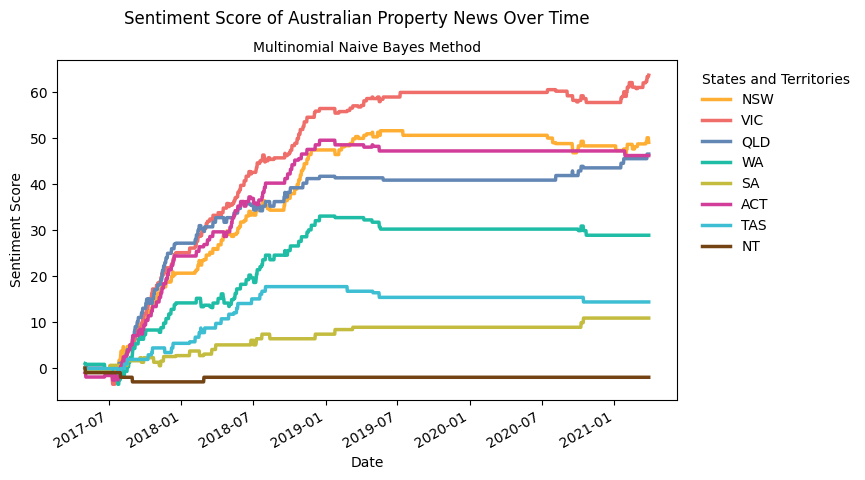

In [37]:
# call the function
plot_cumulative_sum(data5, start_date, end_date)